In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import os
import torch 
from decimal import Decimal
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import math
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import matplotlib.pyplot as plt
import multiprocessing
import glob
import os
import torchattacks

from scipy import linalg
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from torch.autograd import Variable 

ModuleNotFoundError: No module named 'torch'

In [3]:
df1=pd.read_csv('data_without_ioa.csv')
df2=pd.read_csv('data_with_ioa.csv')
# df3=pd.read_csv('calss3_generated.csv')
# df4=pd.read_csv('calss4_generated.csv')


In [3]:
# df3

In [4]:
df1.drop(columns=df1.columns[0], axis=1, inplace=True)
df2.drop(columns=df2.columns[0], axis=1, inplace=True)
# df3.drop(columns=df3.columns[0], axis=1, inplace=True)
# df4.drop(columns=df4.columns[0], axis=1, inplace=True)

df2.drop(['ioa'], axis=1, inplace=True)






df=pd.concat([df1,df2])
for i in ['oa']: #'fmt','numix',
    df.drop([i], axis=1, inplace=True)

# df=pd.concat([df_int])
    
# df.drop(['dstIP','srcIP','oa'], axis=1, inplace=True)


In [5]:
df=df[df['label']!=0]

In [6]:
df['label'].value_counts()


8     38178
11    37363
10    25832
7     10861
2      3177
1      2289
4      1344
5      1270
6       964
3       499
Name: label, dtype: int64

In [7]:
#majority under sampling
# df
# data=df[df['label']!=0]
# data_s = resample(df[df['label']==0], replace=False,n_samples=10000,random_state=123)
# df=pd.concat([data,data_s])

In [7]:
#All sampling
data_train_sampled=pd.DataFrame([],columns=df.columns.values,dtype=float)
sampling=5000
for i in df['label'].unique():
    if i==1:
        data_s = resample(df[df['label']==i], replace=True,n_samples=int(sampling*2),random_state=123)
        data_train_sampled=pd.concat([data_train_sampled,data_s])
        
#     if i==1:
#         data_s = resample(df[df['label']==i], replace=True,n_samples=int(sampling*2),random_state=123)
#         data_train_sampled=pd.concat([data_train_sampled,data_s])
        
#     elif i==2:
#         data_s = resample(df[df['label']==i], replace=True,n_samples=int(sampling*2),random_state=123)
#         data_train_sampled=pd.concat([data_train_sampled,data_s])
        
#     elif i==3:
#         data_s = resample(df[df['label']==i], replace=True,n_samples=int(sampling*2),random_state=123)
#         data_train_sampled=pd.concat([data_train_sampled,data_s])
        
        
    elif i==4:
        data_s = resample(df[df['label']==i], replace=True,n_samples=int(sampling*2),random_state=123)
        data_train_sampled=pd.concat([data_train_sampled,data_s])
        
#     elif i==5:
#         data_s = resample(df[df['label']==i], replace=True,n_samples=int(sampling*2),random_state=123)
#         data_train_sampled=pd.concat([data_train_sampled,data_s])
        
         
#     elif i==6:
#         data_s = resample(df[df['label']==i], replace=True,n_samples=int(sampling*2),random_state=123)
#         data_train_sampled=pd.concat([data_train_sampled,data_s])
    
    elif df[df['label']==i].shape[0]>sampling:
        
        data_s = resample(df[df['label']==i], replace=False,n_samples=sampling,random_state=123)
        data_train_sampled=pd.concat([data_train_sampled,data_s])
    
    else:
        data_s = resample(df[df['label']==i], replace=True,n_samples=sampling,random_state=123) 
        data_train_sampled=pd.concat([data_train_sampled,data_s])

In [8]:
# X,y = df.iloc[:, :-1], df.iloc[:, [-1]]
X, y = data_train_sampled.iloc[:, :-1], data_train_sampled.iloc[:, [-1]]



In [9]:
X

,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,asduType,numix,cot,addr
538929,6.341554,72303.158509,3.232236e+09,3.232236e+09,2404.0,42126.0,748.0,70.0,0.0,1.0,33.0,4.0,20.0,10.0
537139,6.204554,71493.153248,3.232236e+09,3.232236e+09,2404.0,42126.0,748.0,30.0,0.0,1.0,5.0,4.0,20.0,10.0
536302,6.142552,71113.132922,3.232236e+09,3.232236e+09,2404.0,42126.0,748.0,26.0,0.0,1.0,3.0,4.0,20.0,10.0
536889,6.184559,71373.209308,3.232236e+09,3.232236e+09,42126.0,2404.0,76.0,4.0,1.0,1.0,31.0,4.0,20.0,10.0
470455,20.592457,37812.185928,3.232236e+09,3.232236e+09,42126.0,2404.0,68.0,14.0,0.0,1.0,100.0,1.0,6.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400028,21.172180,196544.801946,3.232238e+09,3.232239e+09,61254.0,2404.0,46.0,4.0,2.0,2.0,9.0,1.0,3.0,55.0
359019,21.150775,23610.752056,3.232239e+09,3.232238e+09,2404.0,61254.0,67.0,25.0,1.0,2.0,36.0,1.0,3.0,65535.0
399941,21.112408,196187.080964,3.232238e+09,3.232239e+09,61254.0,2404.0,46.0,4.0,2.0,2.0,9.0,1.0,3.0,55.0
400002,21.153406,196437.068365,3.232239e+09,3.232238e+09,2404.0,61254.0,67.0,25.0,1.0,2.0,36.0,1.0,3.0,65535.0


In [10]:
y['label'].value_counts()


1.0     10000
4.0     10000
7.0      5000
8.0      5000
10.0     5000
11.0     5000
2.0      5000
3.0      5000
5.0      5000
6.0      5000
Name: label, dtype: int64

C:\Users\amalb\AppData\Local\Temp/ipykernel_31212/1367956840.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X, y);


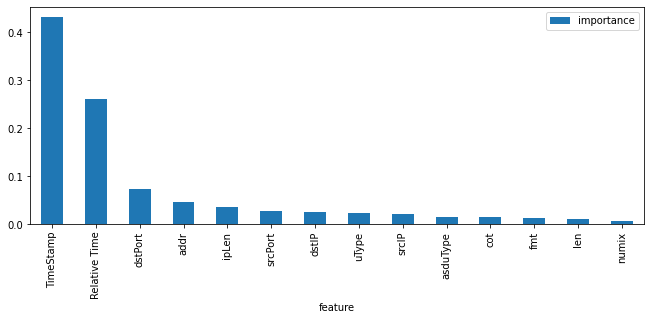

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X, y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [13]:
# 'asduType','len'
# for i in ['fmt','numix','oa']:
#     X.drop([i], axis=1, inplace=True)

In [12]:
X.columns

Index(['TimeStamp', 'Relative Time', 'srcIP', 'dstIP', 'srcPort', 'dstPort',
       'ipLen', 'len', 'fmt', 'uType', 'asduType', 'numix', 'cot', 'addr'],
      dtype='object')

In [13]:
mm = MinMaxScaler()

X_mm = mm.fit_transform(X) 


df_data=torch.Tensor(X_mm)
df_label=y.values[:,0]

# y=torch.Tensor(y.values)


onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = df_label.reshape(len(df_label), 1)
encoded_label = onehot_encoder.fit_transform(integer_encoded)
encoded_label=torch.Tensor(encoded_label)




In [14]:
data_scaled=pd.DataFrame(X_mm,columns=X.columns)

In [15]:
encoded_label[0]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [16]:
data_scaled

,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,asduType,numix,cot,addr
0,0.248407,0.293191,0.000000,0.000369,0.00000,0.67497,0.961644,0.265060,0.0,0.333333,0.258065,1.0,0.386364,0.000153
1,0.242012,0.289867,0.000000,0.000369,0.00000,0.67497,0.961644,0.104418,0.0,0.333333,0.032258,1.0,0.386364,0.000153
2,0.239118,0.288307,0.000000,0.000369,0.00000,0.67497,0.961644,0.088353,0.0,0.333333,0.016129,1.0,0.386364,0.000153
3,0.241079,0.289374,0.000369,0.000000,0.67497,0.00000,0.041096,0.000000,0.5,0.333333,0.241935,1.0,0.386364,0.000153
4,0.913646,0.151625,0.000369,0.000000,0.67497,0.00000,0.030137,0.040161,0.0,0.333333,0.798387,0.0,0.068182,0.000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.940708,0.803135,0.949409,0.999262,1.00000,0.00000,0.000000,0.000000,1.0,0.666667,0.064516,0.0,0.000000,0.000839
59996,0.939709,0.093335,1.000000,0.948708,0.00000,1.00000,0.028767,0.084337,0.5,0.666667,0.282258,0.0,0.000000,1.000000
59997,0.937918,0.801667,0.949409,0.999262,1.00000,0.00000,0.000000,0.000000,1.0,0.666667,0.064516,0.0,0.000000,0.000839
59998,0.939832,0.802693,1.000000,0.948708,0.00000,1.00000,0.028767,0.084337,0.5,0.666667,0.282258,0.0,0.000000,1.000000


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_data, encoded_label, test_size=0.3,random_state=109) # 70% training and 30% test
# X_train = X_train.unsqueeze(1)
# X_test = X_test.unsqueeze(1)


In [18]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, shuffle=True, batch_size=2000)#train_data.tensors[0].shape[0])
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

# print("Training data batches:")
# for X, y in train_loader:
#     print(X.shape, y.shape)
    
# print("\nTest data batches:")
# for X, y in test_loader:
#     print(X.shape, y.shape)

In [19]:
in_f=train_data.tensors[0].shape[1]
out_f=train_data.tensors[1].shape[1]

class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        

        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_4 = nn.Linear(128, 32)

        self.layer_out = nn.Linear(32, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.batchnorm4 = nn.BatchNorm1d(32)

        
    def forward(self, x):

        
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [28]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(14, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 4, 512)
        self.fc2 = nn.Linear(512, 11)

    def forward(self, x):
            
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# model = Net()

In [20]:
model = MulticlassClassification(num_feature = in_f, num_class=out_f)

In [28]:
def epoch(loader, model,loss_function,optimizer):
    for X, y in loader:
#         X=X.reshape(1, 1000, 14)
#         print(y)
        #X = X[:, :, :14]
#         y = y.reshape(-1)
        
        preds = model(X)
        
        preds=torch.softmax(preds,axis=1)
        
        loss = loss_function(preds, torch.max(y, 1)[1])
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_labels=torch.argmax(y,axis=1)
        pred_labels=torch.argmax(preds,axis=1)
        
        acc=100 * torch.mean((pred_labels == y_labels).float()).item()
        #     print(metrics.classification_report(y_labels, pred_labels))

        
    return loss,acc

In [24]:
y

,label
538929,7.0
537139,7.0
536302,7.0
536889,7.0
470455,7.0
...,...
400028,6.0
359019,6.0
399941,6.0
400002,6.0


In [29]:
num_epochs = 400
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.009) #0.009
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

for epo in range(num_epochs):
    
    loss,acc=epoch(train_loader,model,loss_function)
    
    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))
    

X , y = next(iter(test_loader))

preds=torch.softmax(model(X),axis=1)
y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)
testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('Test Accuracy:', testacc)
print(metrics.classification_report(y_labels+1, pred_labels+1))


Epoch 1/400, Loss: 1.468, Accuracy: 99.400
Epoch 2/400, Loss: 1.463, Accuracy: 99.900
Epoch 3/400, Loss: 1.463, Accuracy: 99.900
Epoch 4/400, Loss: 1.468, Accuracy: 99.350
Epoch 5/400, Loss: 1.485, Accuracy: 97.700
Epoch 6/400, Loss: 1.492, Accuracy: 96.950
Epoch 7/400, Loss: 1.482, Accuracy: 97.900
Epoch 8/400, Loss: 1.489, Accuracy: 97.250
Epoch 9/400, Loss: 1.489, Accuracy: 97.200
Epoch 10/400, Loss: 1.488, Accuracy: 97.300
Epoch 11/400, Loss: 1.493, Accuracy: 96.800
Epoch 12/400, Loss: 1.492, Accuracy: 97.000
Epoch 13/400, Loss: 1.481, Accuracy: 98.050
Epoch 14/400, Loss: 1.487, Accuracy: 97.450
Epoch 15/400, Loss: 1.474, Accuracy: 98.750
Epoch 16/400, Loss: 1.495, Accuracy: 96.650
Epoch 17/400, Loss: 1.485, Accuracy: 97.700
Epoch 18/400, Loss: 1.490, Accuracy: 97.150
Epoch 19/400, Loss: 1.490, Accuracy: 97.150
Epoch 20/400, Loss: 1.486, Accuracy: 97.550
Epoch 21/400, Loss: 1.490, Accuracy: 97.100
Epoch 22/400, Loss: 1.485, Accuracy: 97.600
Epoch 23/400, Loss: 1.483, Accuracy: 97.8

Epoch 186/400, Loss: 1.489, Accuracy: 97.200
Epoch 187/400, Loss: 1.486, Accuracy: 97.500
Epoch 188/400, Loss: 1.487, Accuracy: 97.400
Epoch 189/400, Loss: 1.487, Accuracy: 97.400
Epoch 190/400, Loss: 1.484, Accuracy: 97.750
Epoch 191/400, Loss: 1.494, Accuracy: 96.750
Epoch 192/400, Loss: 1.484, Accuracy: 97.750
Epoch 193/400, Loss: 1.488, Accuracy: 97.300
Epoch 194/400, Loss: 1.489, Accuracy: 97.200
Epoch 195/400, Loss: 1.485, Accuracy: 97.600
Epoch 196/400, Loss: 1.488, Accuracy: 97.350
Epoch 197/400, Loss: 1.487, Accuracy: 97.400
Epoch 198/400, Loss: 1.490, Accuracy: 97.150
Epoch 199/400, Loss: 1.482, Accuracy: 97.900
Epoch 200/400, Loss: 1.489, Accuracy: 97.200
Epoch 201/400, Loss: 1.487, Accuracy: 97.400
Epoch 202/400, Loss: 1.485, Accuracy: 97.650
Epoch 203/400, Loss: 1.484, Accuracy: 97.750
Epoch 204/400, Loss: 1.493, Accuracy: 96.800
Epoch 205/400, Loss: 1.490, Accuracy: 97.150
Epoch 206/400, Loss: 1.496, Accuracy: 96.550
Epoch 207/400, Loss: 1.484, Accuracy: 97.700
Epoch 208/

Epoch 368/400, Loss: 1.487, Accuracy: 97.450
Epoch 369/400, Loss: 1.475, Accuracy: 98.550
Epoch 370/400, Loss: 1.463, Accuracy: 99.800
Epoch 371/400, Loss: 1.461, Accuracy: 100.000
Epoch 372/400, Loss: 1.466, Accuracy: 99.550
Epoch 373/400, Loss: 1.462, Accuracy: 99.950
Epoch 374/400, Loss: 1.461, Accuracy: 100.000
Epoch 375/400, Loss: 1.461, Accuracy: 100.000
Epoch 376/400, Loss: 1.462, Accuracy: 99.950
Epoch 377/400, Loss: 1.480, Accuracy: 98.150
Epoch 378/400, Loss: 1.461, Accuracy: 100.000
Epoch 379/400, Loss: 1.461, Accuracy: 100.000
Epoch 380/400, Loss: 1.462, Accuracy: 99.950
Epoch 381/400, Loss: 1.461, Accuracy: 100.000
Epoch 382/400, Loss: 1.462, Accuracy: 99.950
Epoch 383/400, Loss: 1.462, Accuracy: 99.950
Epoch 384/400, Loss: 1.461, Accuracy: 100.000
Epoch 385/400, Loss: 1.473, Accuracy: 98.800
Epoch 386/400, Loss: 1.462, Accuracy: 99.900
Epoch 387/400, Loss: 1.468, Accuracy: 99.350
Epoch 388/400, Loss: 1.462, Accuracy: 99.950
Epoch 389/400, Loss: 1.463, Accuracy: 99.800
Epo

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your model as usual


# Initialize the model and set it to evaluation mode
# model = MulticlassClassification(num_feature = in_f, num_class=out_f)
model.eval()

# Define a temperature value to use during distillation
T = 4

# Define the loss function
criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.006) #0.009



for epo in range(100):
    for X, y in train_loader:
    

            logits = model(X)
            logits = logits / T

            # Calculate the loss
            loss = criterion(torch.log_softmax(logits, dim=1), torch.softmax(y / T, dim=1))

            # Use backpropagation to update the model's parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    print("Epoch {}/{}, Loss: {:.3f}".format(epo+1,num_epochs, loss.item()))


        
        

# Get the logits from the model

# Scale the logits using the temperature




RuntimeError: Expected 3-dimensional input for 3-dimensional weight [32, 14, 3], but got 2-dimensional input of size [2000, 14] instead

## Advarsial Attack


### FGSM

In [49]:
# 1- FGSM 
  
def fgsm(model,X,y, **kwargs):
    
    fgsm = torchattacks.FGSM(model,**kwargs)
    adversarial_examples = fgsm(X, torch.argmax(y,axis=1))
    
    return adversarial_examples

    

for i in np.arange(0,0.1,0.01):
    X , y = next(iter(test_loader))


    adversarial_examples= fgsm(model,X,y, eps=i)

    preds=torch.softmax(model(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:', i ,' Test Accuracy:', testacc)


RuntimeError: Expected 3-dimensional input for 3-dimensional weight [32, 14, 3], but got 2-dimensional input of size [18000, 14] instead

### PGD

In [53]:
# 2- PGD 

def pgd(model,X,y, **kwargs):
    
    pgd = torchattacks.PGD(model,**kwargs)
    adversarial_examples = pgd(X, torch.argmax(y,axis=1))
    
    return adversarial_examples

    

for i in np.arange(0,0.1,0.01):
    X , y = next(iter(test_loader))


    adversarial_examples= pgd(model,X,y, eps=i, alpha=0.005, steps=10, random_start=False)

    preds=torch.softmax(model(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:', i ,' Test Accuracy:', testacc)

RuntimeError: Expected 3-dimensional input for 3-dimensional weight [32, 14, 3], but got 2-dimensional input of size [18000, 14] instead

### Carlini and Wagner

In [27]:
# 3- C&W

def cw(model, X,y,**kwargs):
    
    cw = torchattacks.CW(model,**kwargs)
    adversarial_examples = cw(X, torch.argmax(y,axis=1))
    
    return adversarial_examples

X , y = next(iter(test_loader))

adversarial_examples= cw(model,X,y, c=1, kappa=0, steps=100, lr=0.01) 

preds=torch.softmax(model(adversarial_examples),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c:', 1 ,' Test Accuracy:', testacc)
    
X , y = next(iter(test_loader))


preds=torch.softmax(model(X),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c:', 0 ,' Test Accuracy:', testacc)
    


c: 1  Test Accuracy: 98.70256185531616
c: 0  Test Accuracy: 98.72820377349854


In [50]:
model_robust_PGD = MulticlassClassification(num_feature = in_f, num_class=out_f)
model_robust_FGSM = MulticlassClassification(num_feature = in_f, num_class=out_f)
model_robust_CW = MulticlassClassification(num_feature = in_f, num_class=out_f)

In [51]:
def epoch_adv(loader, model,attack,**kwargs):
    for X, y in loader:
        
        preds = model(X)

        preds=torch.softmax(preds,axis=1)
        
        loss = loss_function(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Adv
        
        adv = attack(model,X,y, **kwargs)


        preds = model(adv)
   

        preds=torch.softmax(preds,axis=1)
        
        loss = loss_function(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        
        
        y_labels=torch.argmax(y,axis=1)
        pred_labels=torch.argmax(preds,axis=1)
        
        acc=100 * torch.mean((pred_labels == y_labels).float()).item()
        
    return loss,acc

In [52]:
#PGD Training

num_epochs = 500
epsilon=0.05
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_robust_PGD.parameters(), lr=0.006) #0.009




    
    
for epo in range(num_epochs):


    loss,acc=epoch_adv(train_loader,model_robust_PGD,pgd,eps=epsilon, alpha=0.01, steps=10, random_start=False)

    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))



    X , y = next(iter(test_loader))

    adversarial_examples = pgd(model_robust_PGD,X,y, eps=epsilon, alpha=0.01, steps=10, random_start=False)

    preds=torch.softmax(model_robust_PGD(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',epsilon,' Test Accuracy:', testacc)
    
    if epo==num_epochs-1:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
    X , y = next(iter(test_loader))


    preds=torch.softmax(model_robust_PGD(X),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',0,' Test Accuracy:', testacc)
    
    if epo==num_epochs-1:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))



NameError: name 'pgd' is not defined

In [ ]:
 X , y = next(iter(test_loader))

adversarial_examples = pgd(model_robust_PGD,X,y, eps=epsilon, alpha=0.01, steps=10, random_start=False)

preds=torch.softmax(model_robust_PGD(adversarial_examples),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('epsilon:',epsilon,' Test Accuracy:', testacc)


print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
X , y = next(iter(test_loader))


preds=torch.softmax(model_robust_PGD(X),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('epsilon:',0,' Test Accuracy:', testacc)

print(metrics.classification_report(y_labels+1, pred_labels+1))



In [ ]:
#FGSM Training

num_epochs = 500
epsilon=0.05
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_robust_FGSM.parameters(), lr=0.009) #0.009




    
    
for epo in range(num_epochs):


    loss,acc=epoch_adv(train_loader,model_robust_FGSM,fgsm,eps=epsilon)

    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))
    




    X , y = next(iter(test_loader))

    adversarial_examples = fgsm(model_robust_FGSM,X,y, eps=epsilon)

    preds=torch.softmax(model_robust_FGSM(adversarial_examples),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',epsilon,' Test Accuracy:', testacc)
    
        
    if epo==num_epochs-1:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
    X , y = next(iter(test_loader))


    preds=torch.softmax(model_robust_FGSM(X),axis=1)

    y_labels=torch.argmax(y,axis=1)
    pred_labels=torch.argmax(preds,axis=1)

    testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
    print('epsilon:',0,' Test Accuracy:', testacc)
    
    

    
    if epo==num_epochs-1:
        
        print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    
    


In [ ]:
#CW Training

num_epochs = 500
c=1
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_robust_CW.parameters(), lr=0.006) #0.009





    
    
for epo in range(num_epochs):


    loss,acc=epoch_adv(train_loader,model_robust_CW,cw,c=c, kappa=0, steps=50, lr=0.01) 

    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epo+1,num_epochs, loss.item(), acc))





In [ ]:
X , y = next(iter(test_loader))

adversarial_examples = cw(model_robust_CW,X,y,c=1, kappa=0, steps=50, lr=0.01) 

preds=torch.softmax(model_robust_CW(adversarial_examples),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c:',c,' Test Accuracy:', testacc)



print(metrics.classification_report(y_labels+1, pred_labels+1))


X , y = next(iter(test_loader))


preds=torch.softmax(model_robust_CW(X),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c',c,' Test Accuracy:', testacc)




print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    



In [ ]:
X , y = next(iter(test_loader))

adversarial_examples = cw(model,X,y,c=1, kappa=0, steps=50, lr=0.01) 

preds=torch.softmax(model(adversarial_examples),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c:',1,' Test Accuracy:', testacc)



print(metrics.classification_report(y_labels+1, pred_labels+1))


X , y = next(iter(test_loader))


preds=torch.softmax(model(X),axis=1)

y_labels=torch.argmax(y,axis=1)
pred_labels=torch.argmax(preds,axis=1)

testacc=100 * torch.mean((pred_labels == y_labels).float()).item()
print('c',1,' Test Accuracy:', testacc)




print(metrics.classification_report(y_labels+1, pred_labels+1))
    
    

